In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('/content/Salaries.csv')
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# **Data Exploration**

In [5]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [6]:
data.shape

(148654, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


check for missing values

In [8]:
missing_values = data.isnull()

# Sum the missing values for each column
missing_count = missing_values.sum()

# Display the missing count for each column
print("Missing Values Count:")
print(missing_count)

Missing Values Count:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# **Describe the data**

In [9]:
data.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [11]:
data.TotalPay.median()

71426.60999999999

box plot for salary column to visulaize the median and find the ranges of salary

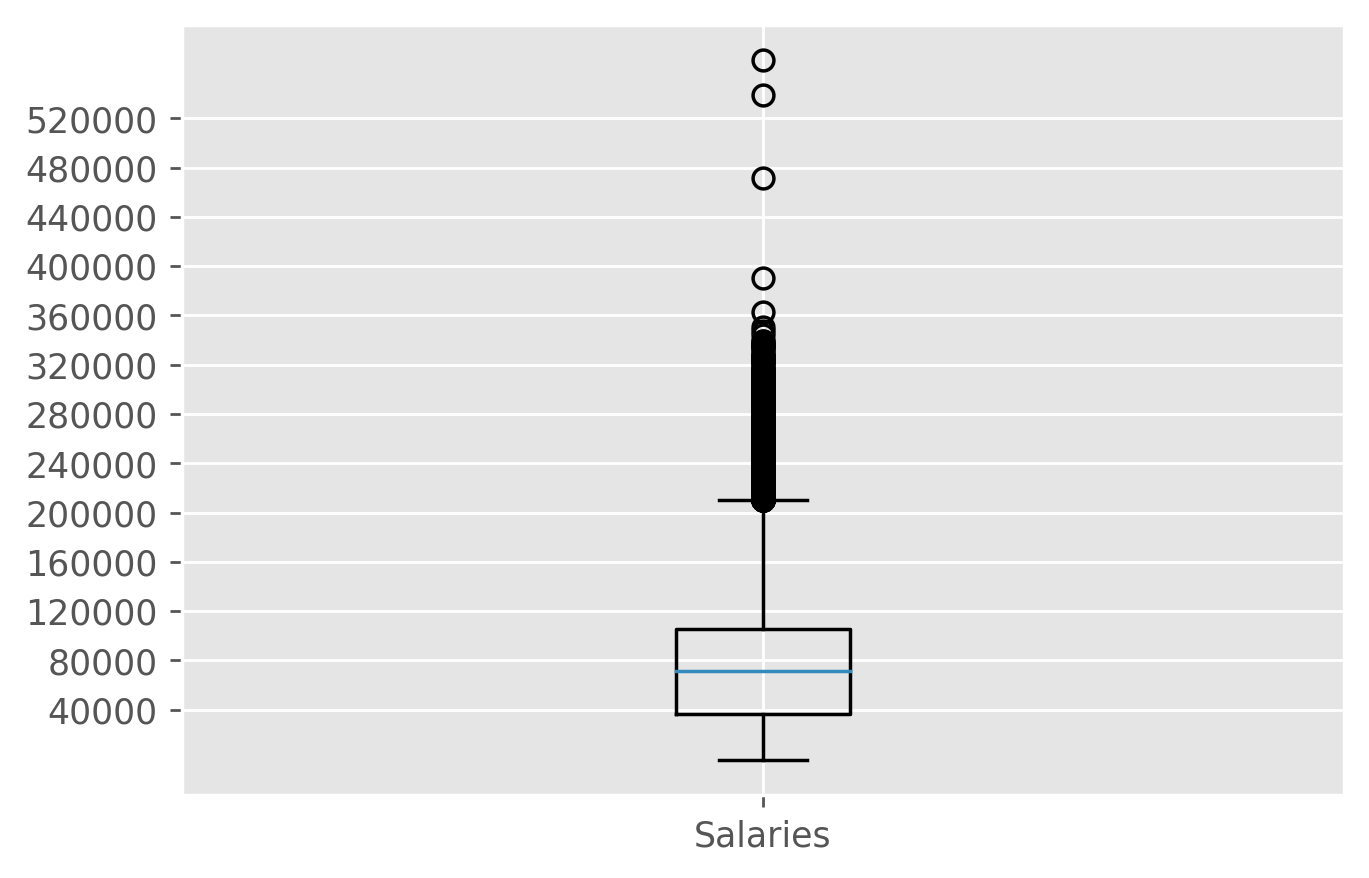

In [34]:
plt.figure(figsize=(6,4),dpi=250)
plt.boxplot(data.TotalPay,labels=['Salaries'])
bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000,480000,520000]
plt.yticks(bins)
plt.show()

# **Data cleaning**

Department column

In [13]:
data[['JobTitle','Department']]=data.JobTitle.str.split('(', 1, expand=True)
data.head(5)

<ipython-input-13-be67593bc653>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['JobTitle','Department']]=data.JobTitle.str.split('(', 1, expand=True)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Department
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,None
1,2,GARY JIMENEZ,CAPTAIN III,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,POLICE DEPARTMENT)
2,3,ALBERT PARDINI,CAPTAIN III,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,POLICE DEPARTMENT)
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,None
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,FIRE DEPARTMENT)


In [14]:
# rearranging columns
col = list(data.columns)
data = data[ col[0:3] + [col[13]] + col[3:13]]
data.head()

,Id,EmployeeName,JobTitle,Department,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,None,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III,POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III,POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,None,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,",FIRE DEPARTMENT),134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [15]:
# there are many employees without mentioned department so replace it with other
data['Department']=data['Department'].fillna('OTHER')
data.head(10)

,Id,EmployeeName,JobTitle,Department,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,OTHER,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III,POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III,POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,OTHER,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,",FIRE DEPARTMENT),134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,OTHER,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF,",FIRE DEPARTMENT),92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,OTHER,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF,",FIRE DEPARTMENT),176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT,",FIRE DEPARTMENT),285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [16]:

#employee with ID = 148624 has other department not (civil/Criminal) as I guess so I edit it

data.loc[148620, 'JobTitle'] ='Attorney (Civil/Criminal)'
data.loc[148620, 'Department'] ='Other'
data.tail()


,Id,EmployeeName,JobTitle,Department,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,OTHER,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,OTHER,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,OTHER,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,OTHER,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",OTHER,0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [17]:
# strip department
data['Department']=data['Department'].str.rstrip(')')
data

,Id,EmployeeName,JobTitle,Department,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,OTHER,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III,POLICE DEPARTMENT,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III,POLICE DEPARTMENT,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,OTHER,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,",FIRE DEPARTMENT,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,OTHER,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,OTHER,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,OTHER,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,OTHER,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [18]:
# remove duplicates
data.drop_duplicates() # there is no duplicates

,Id,EmployeeName,JobTitle,Department,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,OTHER,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III,POLICE DEPARTMENT,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III,POLICE DEPARTMENT,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,OTHER,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,",FIRE DEPARTMENT,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,OTHER,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,OTHER,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,OTHER,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,OTHER,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [19]:
# it is clear that Notes and Status columns aren't useful
data=data.drop(columns={'Notes','Status'})

In [20]:
# solving NULL values:

# in Employees name, there are four rows which don't have names, in addition to having null values in base pay
for x in data.index:
    if data.loc[x, 'EmployeeName'] == 'Not provided':
        data.drop(x, inplace=True)

print(data.tail(10))


            Id           EmployeeName                      JobTitle  \
148640  148641     Charlene D Mccully       Parking Control Officer   
148641  148642  Raphael Marquis Goins                  Museum Guard   
148642  148643      Dominic C Marquez                   Sign Worker   
148643  148644             Kim Brewer       Parking Control Officer   
148644  148645           Randy D Winn  Stationary Eng, Sewage Plant   
148645  148646       Carolyn A Wilson     Human Services Technician   
148647  148648         Joann Anderson   Communications Dispatcher 2   
148648  148649            Leon Walker                     Custodian   
148649  148650          Roy I Tillery                     Custodian   
148653  148654              Joe Lopez    Counselor, Log Cabin Ranch   

       Department  BasePay  OvertimePay  OtherPay  Benefits  TotalPay  \
148640      OTHER      0.0          0.0      0.00       0.0      0.00   
148641      OTHER      0.0          0.0      0.00       0.0      0.00   

In [21]:
# Employees who don't have benefits so it must be replaced with zeros
# employees who have null values at base pay : it means that they aren't working permenantly in the company, they may are freelancers or working as part time
# they have payment in otherpay so I will replace NAN with zeros
data[['Benefits', 'BasePay', 'OtherPay', 'OvertimePay']] = data[[
    'Benefits', 'BasePay', 'OtherPay', 'OvertimePay']].fillna(0.0)

data.head(10)

,Id,EmployeeName,JobTitle,Department,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,OTHER,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III,POLICE DEPARTMENT,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III,POLICE DEPARTMENT,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,OTHER,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,",FIRE DEPARTMENT,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,OTHER,118602.00,8601.00,189082.74,0.0,316285.74,316285.74,2011,San Francisco
6,7,ALSON LEE,"BATTALION CHIEF,",FIRE DEPARTMENT,92492.01,89062.90,134426.14,0.0,315981.05,315981.05,2011,San Francisco
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,OTHER,256576.96,0.00,51322.50,0.0,307899.46,307899.46,2011,San Francisco
8,9,MICHAEL MORRIS,"BATTALION CHIEF,",FIRE DEPARTMENT,176932.64,86362.68,40132.23,0.0,303427.55,303427.55,2011,San Francisco
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT,",FIRE DEPARTMENT,285262.00,0.00,17115.73,0.0,302377.73,302377.73,2011,San Francisco


In [22]:
# employees who have zeros in TotalpayBenefits, I guess that they aren't working
for x in data.index:
    if data.loc[x, 'TotalPayBenefits'] == 0.00:
        data.drop(x, inplace=True)
data.tail(10)

,Id,EmployeeName,JobTitle,Department,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148617,148618,Charles F Williams Iii,Pool Lifeguard,OTHER,17.26,0.0,0.00,4.04,17.26,21.30,2014,San Francisco
148618,148619,Denise Van Alstine,Elections Clerk,OTHER,0.00,0.0,19.81,0.00,19.81,19.81,2014,San Francisco
148619,148620,Ian V Cameron,IS Program Analyst-Assistant,OTHER,6.04,0.0,10.05,2.30,16.09,18.39,2014,San Francisco
148620,148621,India C Sabater,Attorney (Civil/Criminal),Other,15.50,0.0,0.00,0.16,15.50,15.66,2014,San Francisco
148621,148622,Kenneth Mackey,Transit Operator,OTHER,0.00,0.0,15.35,0.00,15.35,15.35,2014,San Francisco
148622,148623,Jacqueline Hubbard,Senior Clerk,OTHER,0.00,0.0,13.77,0.00,13.77,13.77,2014,San Francisco
148623,148624,Deborah B Honig,Attorney,Civil/Criminal,0.00,0.0,13.35,0.13,13.35,13.48,2014,San Francisco
148624,148625,Lorraine Rosenthal,Senior Clerk,OTHER,0.00,0.0,12.89,0.00,12.89,12.89,2014,San Francisco
148625,148626,Renato C Gurion,Registered Nurse,OTHER,0.00,0.0,6.00,1.24,6.00,7.24,2014,San Francisco
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",OTHER,0.00,0.0,-618.13,0.00,-618.13,-618.13,2014,San Francisco


In [23]:
data = data.reset_index(drop=True)
data

,Id,EmployeeName,JobTitle,Department,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,OTHER,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III,POLICE DEPARTMENT,155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III,POLICE DEPARTMENT,212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,OTHER,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,",FIRE DEPARTMENT,134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...
148619,148623,Jacqueline Hubbard,Senior Clerk,OTHER,0.00,0.00,13.77,0.00,13.77,13.77,2014,San Francisco
148620,148624,Deborah B Honig,Attorney,Civil/Criminal,0.00,0.00,13.35,0.13,13.35,13.48,2014,San Francisco
148621,148625,Lorraine Rosenthal,Senior Clerk,OTHER,0.00,0.00,12.89,0.00,12.89,12.89,2014,San Francisco
148622,148626,Renato C Gurion,Registered Nurse,OTHER,0.00,0.00,6.00,1.24,6.00,7.24,2014,San Francisco


# **Histogram**

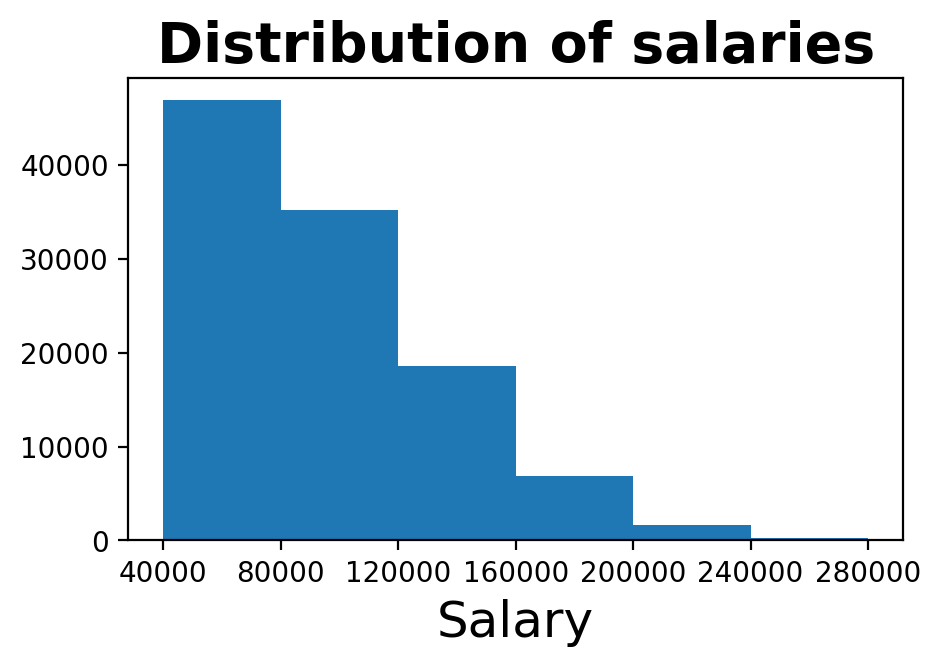

In [ ]:
# histogram represents the salary as it deduced that the highest frequency salary from 40000 to 80000
plt.figure(figsize=(5,3),dpi=200)
bins=[40000,80000,120000,160000,200000,240000,280000]
plt.hist(data.TotalPay,bins=bins)
plt.xticks(bins)
plt.title('Distribution of salaries',fontdict={'fontsize':20,'fontweight':'bold'})
plt.xlabel('Salary',fontdict={'fontsize':18})
plt.show()

# **Pie chart**

It seems that both the police and fire departments constitute small percentages, while the majority falls under the category of "other." To address this issue, revisions are necessary to properly allocate departments and reduce the disproportionately high percentage labeled as "other."

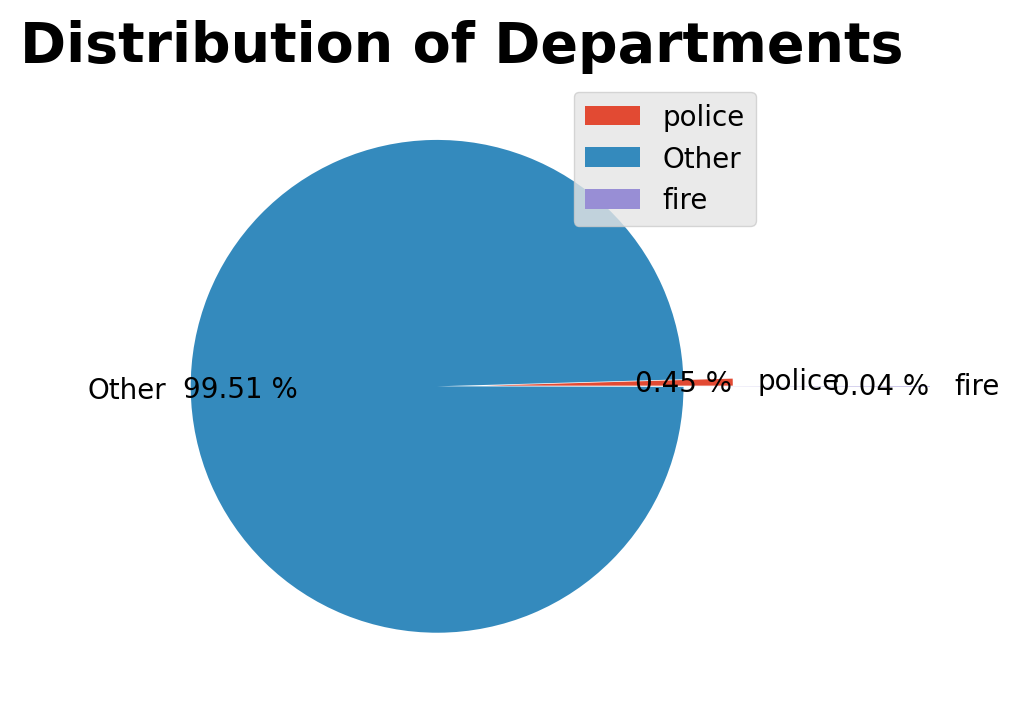

In [26]:
plt.figure(figsize=(6,4),dpi=200)
police=data.loc[data.Department=='POLICE DEPARTMENT'].count()[0]
fire=data.loc[data.Department=='FIRE DEPARTMENT'].count()[0]
other=data.loc[data.Department=='OTHER'].count()[0]
weights=[police,other,fire]
labels=['police','Other','fire']
colors=['blue','red','purple']
explode=[0.1,0.1,0.9]
plt.title('Distribution of Departments',fontdict={'fontsize':20,'fontweight':'bold'})
plt.pie(weights,labels=labels,explode=explode,autopct='%0.2f %%',pctdistance=0.8)
plt.legend(loc='upper right')

plt.show()

# **Groupby**

In [28]:
#group the data by one or more columns and calculate summary statistics . compare the average salaries
data.groupby(['JobTitle']).agg({'TotalPay': ['mean', 'min', 'max']})

TotalPay            \
                                                        mean       min   
JobTitle                                                                 
ACCOUNT CLERK                                   44035.664337    614.00   
ACCOUNTANT                                      47429.268000   1148.40   
ACCOUNTANT INTERN                               29031.742917   2981.53   
ACPO,JuvP, Juv Prob                             62290.780000  62290.78   
ACUPUNCTURIST                                   67594.400000  67594.40   
...                                                      ...       ...   
X-RAY LABORATORY AIDE                           52705.880385   5343.69   
X-Ray Laboratory Aide                           50823.942700   1007.00   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000  53632.87   
Youth Comm Advisor                              41414.307500  19212.71   
ZOO CURATOR                                     66686.560000  66686.56   

                                                          
                                                     max  
JobTitle                                                  
ACCOUNT CLERK                                   60838.20  
ACCOUNTANT                                      65392.01  
ACCOUNTANT INTERN                               58799.53  
ACPO,JuvP, Juv Prob                             62290.78  
ACUPUNCTURIST                                   67594.40  
...                                                  ...  
X-RAY LABORATORY AIDE                           85077.40  
X-Ray Laboratory Aide                           99812.97  
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.87  
Youth Comm Advisor                              57544.73  
ZOO CURATOR                                     66686.56  

[2159 rows x 3 columns]

In [30]:
data.groupby(['Year']).agg({'TotalPay': [
      'mean', 'min', 'max', 'count'], 'TotalPayBenefits': ['mean', 'min', 'max', 'count']})

TotalPay                           TotalPayBenefits          \
              mean     min        max  count             mean     min   
Year                                                                    
2011  71750.056751    0.30  567595.43  36156     71750.056751    0.30   
2012  74113.262265    0.00  362844.66  36766    100553.229232    1.91   
2013  77611.443142    0.00  347102.32  37606    101440.519714  -33.89   
2014  75517.402123 -618.13  471952.64  38096    100321.970301 -618.13   

                        
            max  count  
Year                    
2011  567595.43  36156  
2012  407274.78  36766  
2013  425815.28  37606  
2014  510732.68  38096

In [31]:
data.groupby(['JobTitle']).agg({'BasePay': ['mean', 'min', 'max'], 'OvertimePay': [
      'mean', 'min', 'max'], 'OtherPay': ['mean', 'min', 'max']})

BasePay            \
                                                        mean       min   
JobTitle                                                                 
ACCOUNT CLERK                                   43300.806506    614.00   
ACCOUNTANT                                      46643.172000      0.00   
ACCOUNTANT INTERN                               28732.663958   2981.53   
ACPO,JuvP, Juv Prob                             62290.780000  62290.78   
ACUPUNCTURIST                                   66374.400000  66374.40   
...                                                      ...       ...   
X-RAY LABORATORY AIDE                           47664.773077   4690.68   
X-Ray Laboratory Aide                           46086.387100   1007.00   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  52609.910000  52609.91   
Youth Comm Advisor                              39077.957500  13915.80   
ZOO CURATOR                                     43148.000000  43148.00   

                                                          OvertimePay       \
                                                     max         mean  min   
JobTitle                                                                     
ACCOUNT CLERK                                   60838.20   373.200843  0.0   
ACCOUNTANT                                      65392.01     0.000000  0.0   
ACCOUNTANT INTERN                               58501.72    24.430625  0.0   
ACPO,JuvP, Juv Prob                             62290.78     0.000000  0.0   
ACUPUNCTURIST                                   66374.40     0.000000  0.0   
...                                                  ...          ...  ...   
X-RAY LABORATORY AIDE                           60086.62  3571.223462  0.0   
X-Ray Laboratory Aide                           66123.01  3483.767100  0.0   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  52609.91     0.000000  0.0   
Youth Comm Advisor                              57544.73     0.000000  0.0   
ZOO CURATOR                                     43148.00     0.000000  0.0   

                                                              OtherPay  \
                                                     max          mean   
JobTitle                                                                 
ACCOUNT CLERK                                   10753.06    361.656988   
ACCOUNTANT                                          0.00    786.096000   
ACCOUNTANT INTERN                                 624.84    274.648333   
ACPO,JuvP, Juv Prob                                 0.00      0.000000   
ACUPUNCTURIST                                       0.00   1220.000000   
...                                                  ...           ...   
X-RAY LABORATORY AIDE                           23016.22   1469.883846   
X-Ray Laboratory Aide                           29239.96   1253.788500   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      0.00   1022.960000   
Youth Comm Advisor                                  0.00   2336.350000   
ZOO CURATOR                                         0.00  23538.560000   

                                                                    
                                                     min       max  
JobTitle                                                            
ACCOUNT CLERK                                       0.00   3370.13  
ACCOUNTANT                                          0.00   2782.08  
ACCOUNTANT INTERN                                   0.00   3069.19  
ACPO,JuvP, Juv Prob                                 0.00      0.00  
ACUPUNCTURIST                                    1220.00   1220.00  
...                                                  ...       ...  
X-RAY LABORATORY AIDE                             200.00   5643.93  
X-Ray Laboratory Aide                               0.00   7916.20  
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS   1022.96   1022.96  
Youth Comm Advisor                                  0.00  

It seems that there is a negative correlation between BasePay and OtherPay, as only a small subset of employees receiving base pay also receive other pay. Additionally, when an employee receives both types of pay, there tends to be an inverse relationship; one of them is high while the other is comparatively lower.

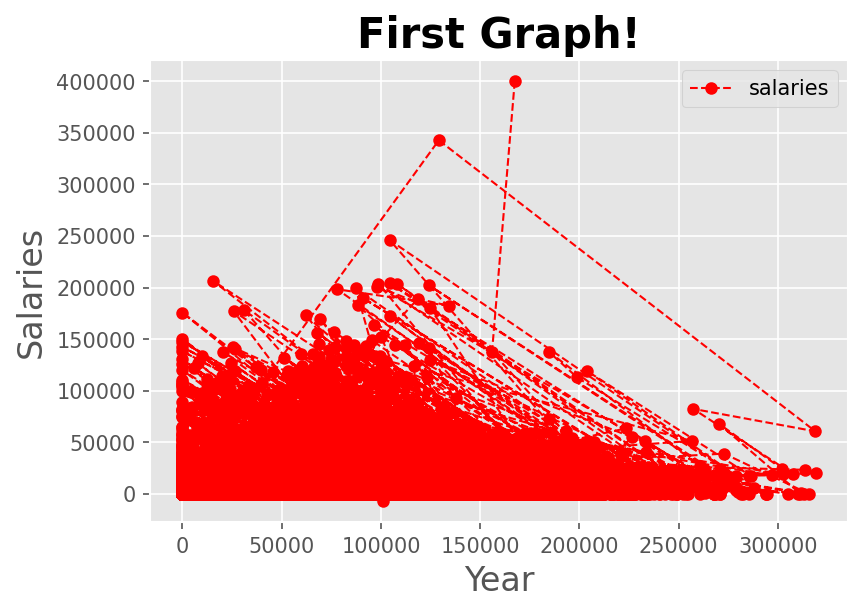

In [32]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(data['BasePay'],data['OtherPay'],label="salaries",color='red',linewidth=1,marker='.',markersize=10,linestyle='--')
plt.title('First Graph!',fontdict={'fontsize':20,'fontweight':'bold'})
plt.ylabel('Salaries',fontdict={'fontsize':16})
plt.xlabel('Year',fontdict={'fontsize' : 16})
plt.legend()
plt.show()

In [33]:
data.to_csv("final_salaries")

# **summary of insights**

Upon conducting an analysis involving data exploration, cleaning, visualization, and grouping, numerous insights have been gleaned. No duplicate rows were identified; however, it was observed that both the notes and status columns contained no values, leading to their removal. Subsequent examination for missing values revealed a significant number in the base pay and benefits columns, along with four instances of missing values in overtime pay and other pay. Upon further filtering, it was uncovered that four employees lacked names and displayed zeros across all columns, suggesting they may no longer be employed. Consequently, these entries were removed. The decision to fill missing values in base pay and benefits with zeros was driven by the presence of salaries in the other pay column, implying potential part-time employment or a similar arrangement.
Following the visualization process, it was observed that salaries spanned a range of 35,000 to 200,000, with several outliers extending up to 520,000. Utilizing a histogram, I determined that the salary frequency peaked within the 40,000 to 80,000 range. Using a pie chart, It seems that both the police and fire departments constitute small percentages, while the majority falls under the category of "other." To address this issue, revisions are necessary to properly allocate departments and reduce the disproportionately high percentage labelled as "other."
A scatter plot was created to explore the correlation between base pay and other pay. Notably, a negative correlation emerged, indicating that a limited subset of employees receiving base pay also received other pay. Moreover, when employees received both types of pay, an inverse relationship was evident, with one being high while the other was comparatively lower.
To delve further, I grouped the salary and year columns to ascertain the average highest salary per year. The analysis revealed that the peak average salary occurred in 2013.

